# Comparison of the performances for the different models

Trained models: random forest, perceptron (with and without elasticnet regularization), SVM

## Loading necessary libraries...

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn

## Loading results

In [2]:
methods = ["MLP", "MLPalt", "RF", "RFalt", "RRandomForest", "SVMalt", "RSVM", "DNN_patient_moa", "GNN_patient_moa", 
           "GNN_prostate_full_moa"]
dates = ["2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", "2023-11-09", 
         "2023-11-09", "2023-11-09", "2023-11-09"]
all_scores = {}
metnames = []
for ind in range(len(methods)):
    file = "../../results/F1000/" + methods[ind] + "_Scores_" + dates[ind] + ".obj"
    file = open(file, "rb")
    desc_met = methods[ind]
    all_scores[desc_met] = pickle.load(file)
    metnames.append(desc_met)

## Computing means and standard deviations

### Means

In [3]:
scorelist = ["fit_time", "score_time", "test_accuracy", "test_balanced_accuracy", "test_roc_auc", "train_accuracy", "train_balanced_accuracy"]

all_means = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_means[i][j] = np.stack(all_scores[metnames[i]][scorelist[j]]).mean()

# Create the pandas DataFrame
all_means = pd.DataFrame(all_means, columns = scorelist, index = metnames)
# print dataframe.
all_means

fit_time   score_time  test_accuracy  \
MLP                     1260.579460     1.652686       0.689961   
MLPalt                    52.114527     0.527847       0.633843   
RF                        13.836205     0.817847       0.605709   
RFalt                    101.730922     3.373649       0.620652   
RRandomForest           5897.508600    12.853600       0.621626   
SVMalt                  3824.193109  1922.853633       0.657071   
RSVM                   19835.631400  1457.369000       0.657502   
DNN_patient_moa            5.961555     2.597742       0.593034   
GNN_patient_moa           24.230961    25.790594       0.612728   
GNN_prostate_full_moa    966.376588     1.880755       0.646401   

                       test_balanced_accuracy  test_roc_auc  train_accuracy  \
MLP                                  0.489853      0.891179        0.999926   
MLPalt                               0.478855      0.862865        0.999996   
RF                                   0.359897      0.822467        0.989204   
RFalt                                0.370599      0.870541        1.000000   
RRandomForest                        0.370887      0.857468        1.000000   
SVMalt                               0.391971      0.880876        0.758815   
RSVM                                 0.392536      0.866084        0.759698   
DNN_patient_moa                      0.383904      0.774432        0.634179   
GNN_patient_moa                      0.373728      0.774088        0.629504   
GNN_prostate_full_moa                0.422080      0.837242        0.804170   

                       train_balanced_accuracy  
MLP                                   0.999839  
MLPalt                                0.999990  
RF                                    0.975944  
RFalt                                 1.000000  
RRandomForest                         1.000000  
SVMalt                                0.531362  
RSVM                                  0.532554  
DNN_patient_moa                       0.422607  
GNN_patient_moa                       0.386123  
GNN_prostate_full_moa                 0.579406

### Standard deviations

In [4]:
all_std = np.empty((len(metnames), len(scorelist)))

for i in range(len(metnames)):
    for j in range(len(scorelist)):
        all_std[i][j] = np.stack(all_scores[metnames[i]][scorelist[j]]).std()

# Create the pandas DataFrame
all_std = pd.DataFrame(all_std, columns = scorelist, index = metnames)
# print dataframe.
all_std

fit_time  score_time  test_accuracy  \
MLP                     95.748981    0.034656       0.006557   
MLPalt                   3.235296    0.014759       0.008723   
RF                       0.110770    0.030485       0.003099   
RFalt                    0.263465    0.106263       0.003302   
RRandomForest           71.833969    0.230461       0.004226   
SVMalt                  34.259968   51.860650       0.003618   
RSVM                   224.407957    7.163110       0.003595   
DNN_patient_moa          0.475991    0.126778       0.008326   
GNN_patient_moa          1.462140    7.378697       0.014234   
GNN_prostate_full_moa   17.898444    0.056347       0.100669   

                       test_balanced_accuracy  test_roc_auc  train_accuracy  \
MLP                                  0.007030      0.004546        0.000208   
MLPalt                               0.008692      0.004932        0.000013   
RF                                   0.004363      0.006377        0.000732   
RFalt                                0.003291      0.001938        0.000000   
RRandomForest                        0.003691      0.004128        0.000000   
SVMalt                               0.004517      0.003274        0.000788   
RSVM                                 0.004814      0.003265        0.000872   
DNN_patient_moa                      0.006237      0.007727        0.005506   
GNN_patient_moa                      0.008943      0.020576        0.019373   
GNN_prostate_full_moa                0.103815      0.112947        0.153777   

                       train_balanced_accuracy  
MLP                                   0.000450  
MLPalt                                0.000030  
RF                                    0.001588  
RFalt                                 0.000000  
RRandomForest                         0.000000  
SVMalt                                0.001184  
RSVM                                  0.001315  
DNN_patient_moa                       0.004907  
GNN_patient_moa                       0.013032  
GNN_prostate_full_moa                 0.160796

## Plotting results

### Averaged results

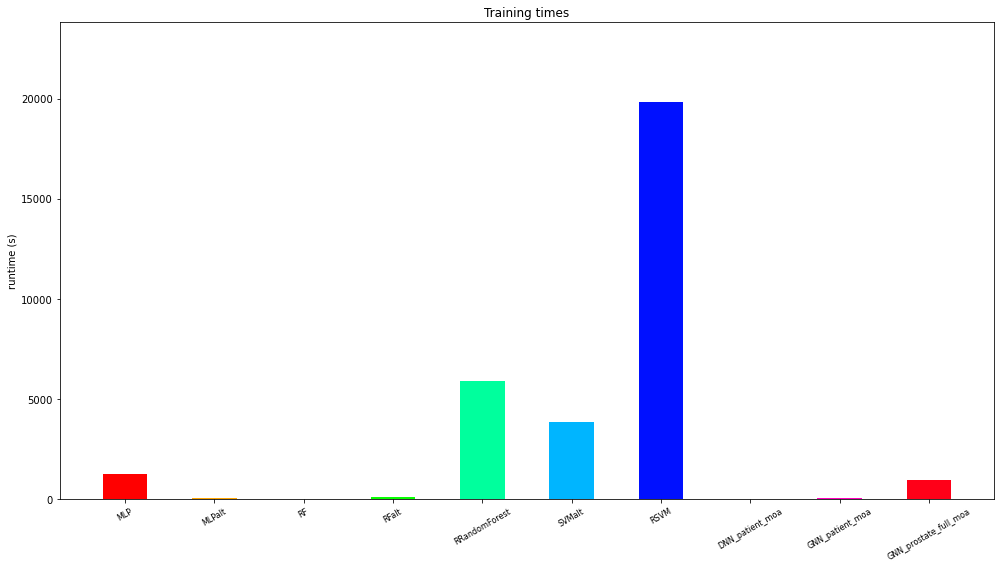

In [5]:
train_time = all_means["fit_time"]
my_cmap = plt.get_cmap("hsv")

def autolabel(rectangles):
    """attach some text vi autolabel on rectangles."""
    for rect in rectangles:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2.0,
            1.05 * height,
            "%.4f" % height,
            ha="center",
            va="bottom",
        )
        plt.setp(plt.xticks()[1], rotation=30)

plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), train_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(train_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Training times")
plt.tight_layout()
plt.show()

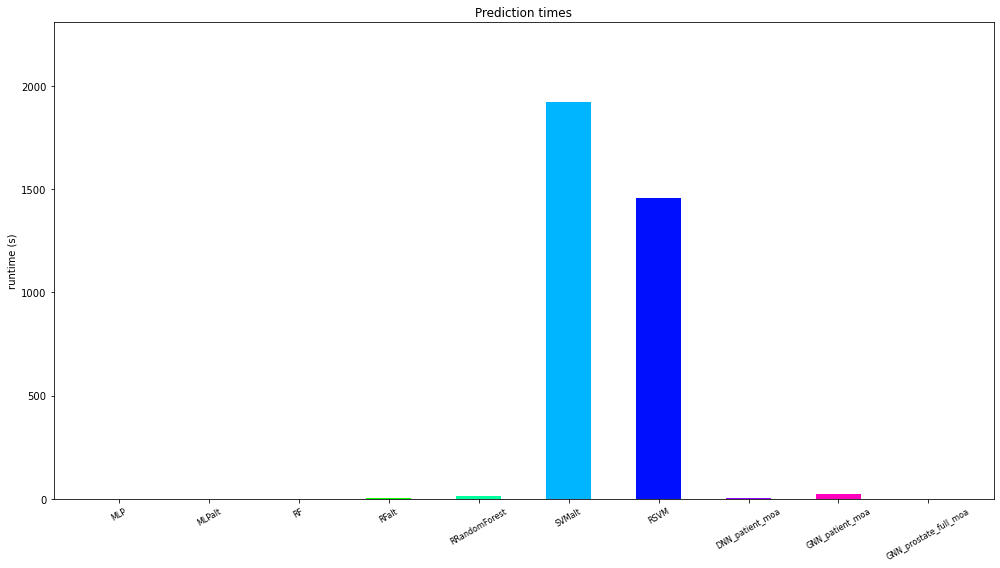

In [6]:
predict_time = all_means["score_time"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), predict_time, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(predict_time) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("runtime (s)")
ax.set_title("Prediction times")
plt.tight_layout()
plt.show()

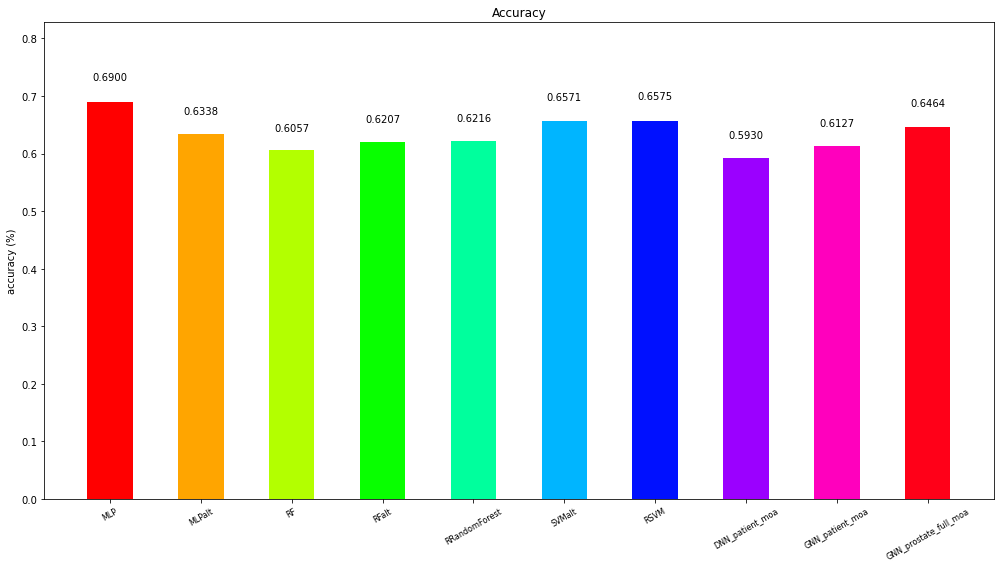

In [7]:
accuracy = all_means["test_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), accuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(accuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

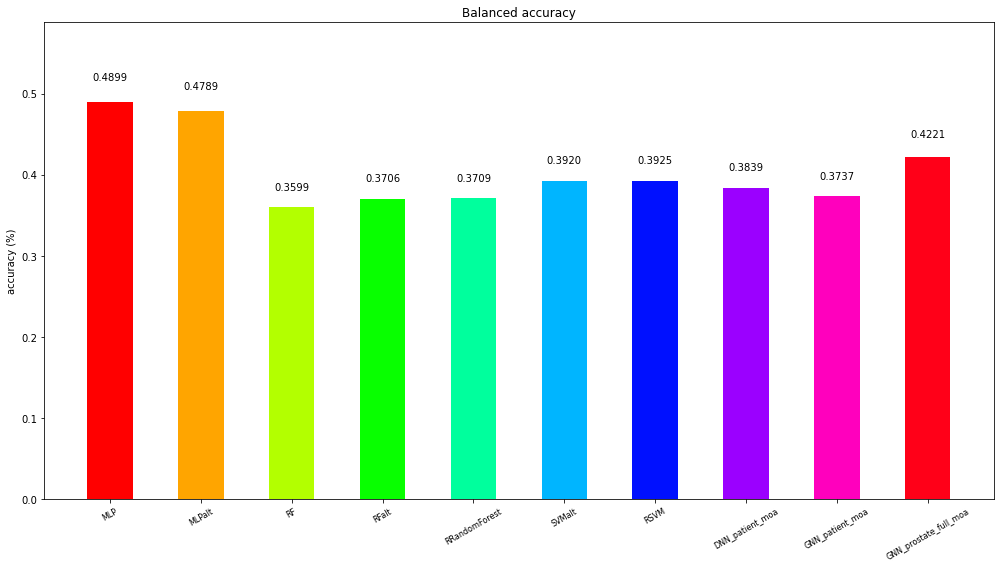

In [8]:
baccuracy = all_means["test_balanced_accuracy"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), baccuracy, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(baccuracy) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("accuracy (%)")
ax.set_title("Balanced accuracy")
autolabel(rectangles)
plt.tight_layout()
plt.show()

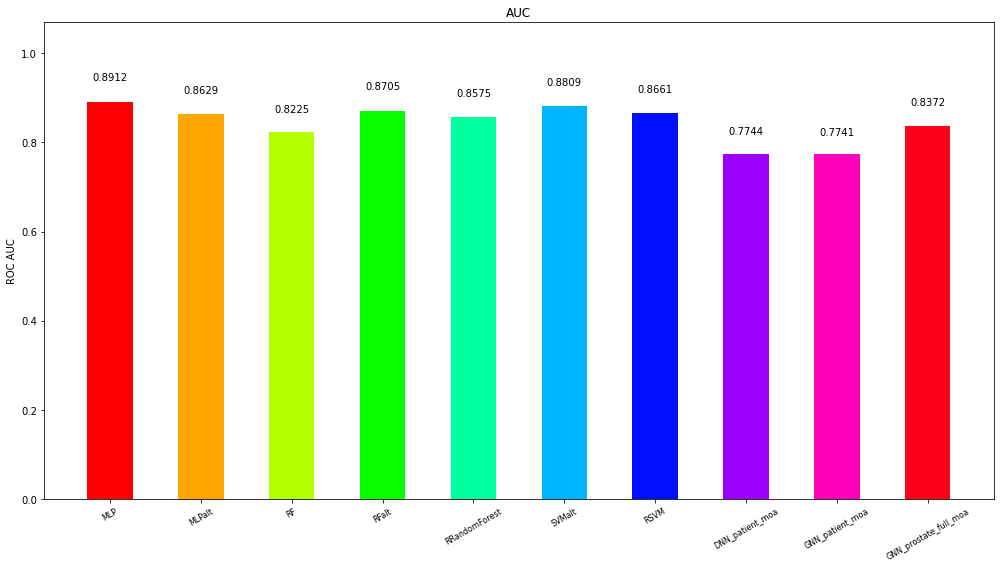

In [9]:
auc = all_means["test_roc_auc"]
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
rectangles = plt.bar(range(len(metnames)), auc, width=0.5, color=my_cmap(np.linspace(0, 1, len(metnames))))
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ymax = max(auc) * 1.2
ax.set_ylim((0, ymax))
ax.set_ylabel("ROC AUC")
ax.set_title("AUC")
autolabel(rectangles)
plt.tight_layout()
plt.show()

### Full distribution

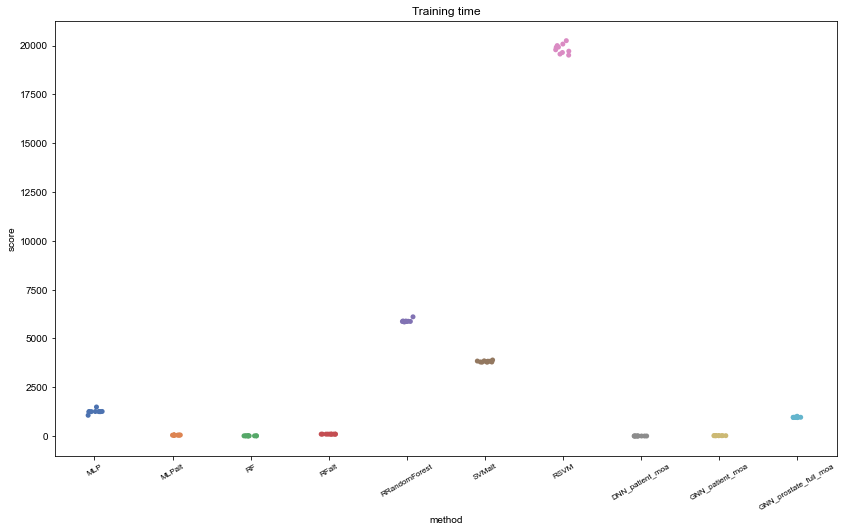

In [10]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["fit_time"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Training time")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

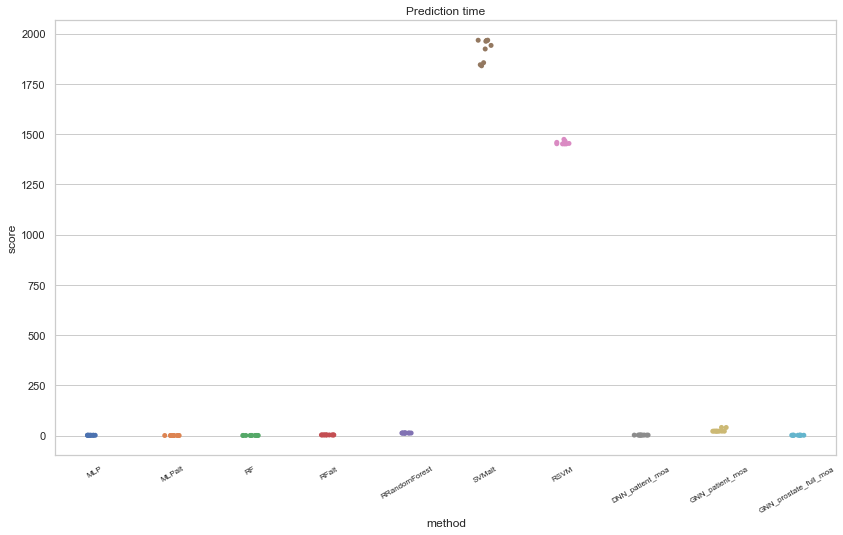

In [11]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["score_time"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Prediction time")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

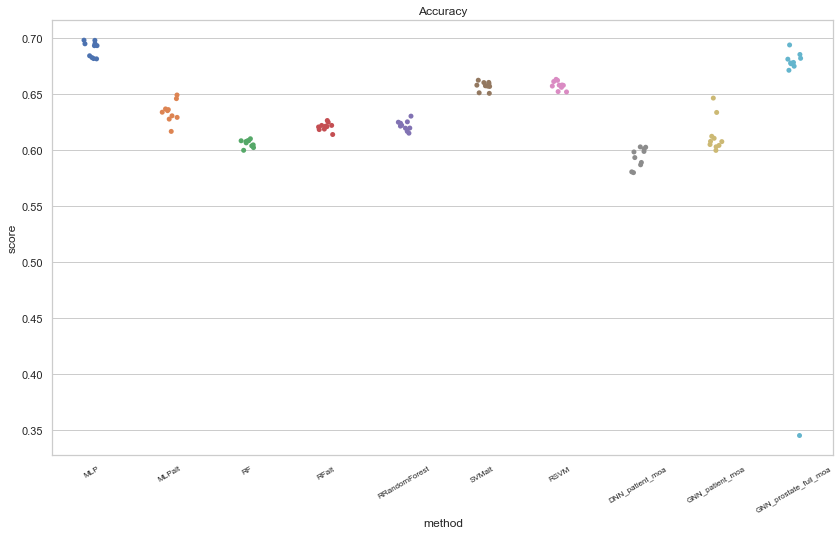

In [12]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_accuracy"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Accuracy")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

In [13]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_balanced_accuracy"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("Balanced accuracy")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()

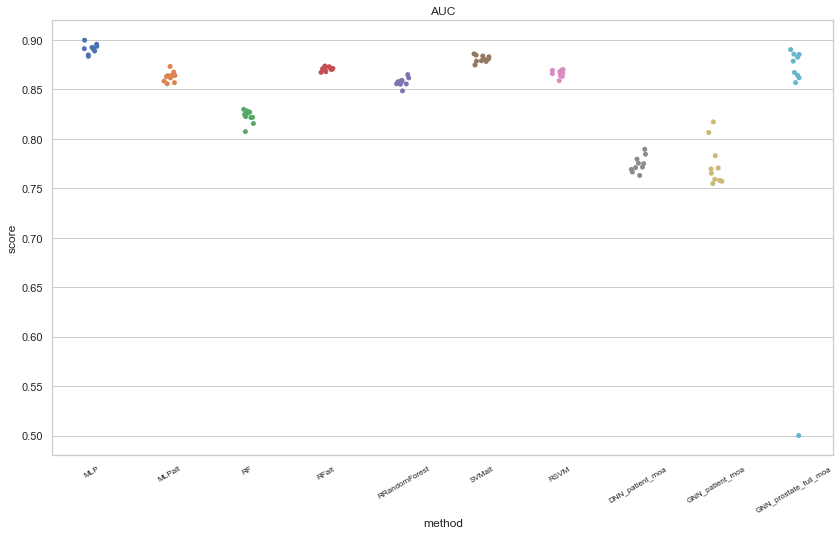

In [14]:
dt = np.dtype([('method', "U25"), ('score', np.float64)])
cur_data = np.empty(len(metnames)*10, dtype = dt)

for i in range(len(metnames)):
    for j in range(10):
        cur_data[i*10+j]["method"] = metnames[i]
        cur_data[i*10+j]["score"] = all_scores[metnames[i]]["test_roc_auc"][j]

cur_data = pd.DataFrame(cur_data)
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.set_xticks(np.linspace(0, len(metnames) - 1, len(metnames)))
ax.set_xticklabels(metnames, fontsize=8)
plt.setp(plt.xticks()[1], rotation=30)
ax.set_title("AUC")
seaborn.set(style = 'whitegrid')
seaborn.stripplot(x = "method", y = "score", data = cur_data)
plt.show()